What is the most optimal skill to learn for Data Analysts?

Methodology:

Continue from last notebook to find percent of postings with skill

Visualize median salary vs percent skill demand

(Optional) Determine if certain technologies are more prevalent

Original Exploration:

15_Matplotlib_Scatter_Plots.ipynb

16_Matplotlib_Advanced_Customization.ipynb

In [1]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Loading data
df = pd.read_csv("hf://datasets/lukebarousse/data_jobs/data_jobs.csv")

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
#converted to list
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_DA_US = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()

In [3]:
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])
df_DA_US_exploded = df_DA_US.explode('job_skills')
df_DA_US_exploded[['salary_year_avg','job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [12]:
df_DA_skills = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median':'median_salary'})

df_DA_skills

,skill_count,median_salary
job_skills,,
sql,2508,91000.0
excel,1808,84392.0
python,1431,97500.0
tableau,1364,92875.0
sas,926,90000.0
...,...,...
theano,1,100000.0
typescript,1,65000.0
vmware,1,147500.0


In [15]:
##Now for percentage lets take length of our Original dataframe

DA_job_count = len(df_DA_US)

##Add new column
df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] /  DA_job_count * 100

df_DA_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.0,57.655172
excel,1808,84392.0,41.563218
python,1431,97500.0,32.896552
tableau,1364,92875.0,31.356322
sas,926,90000.0,21.287356
...,...,...,...
theano,1,100000.0,0.022989
typescript,1,65000.0,0.022989
vmware,1,147500.0,0.022989


In [18]:
## Filtering values greater than 5%, for this creating a new variable to filter and then creating a new dataframe
skill_percent = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_percent]

df_DA_skills_high_demand


,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


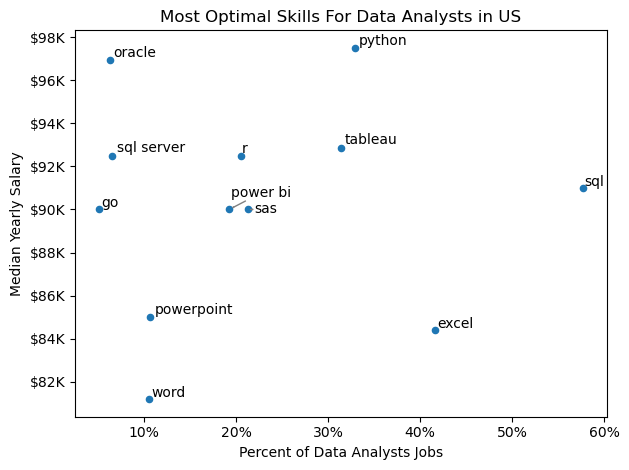

In [23]:
from adjustText import adjust_text

# Create a scatter plot:
# - x-axis = how many job postings mention the skill (skill_percent)
# - y-axis = the median yearly salary for that skill (median_salary)
df_DA_skills_high_demand.plot(kind='scatter', x='skill_percent', y='median_salary')

# Create an empty list to store the text labels so we can adjust them later
texts = []

# Loop through each skill (row) in df_DA_skills_high_demand using enumerate
# - i = row number (0, 1, 2, …)
# - txt = skill name (from the DataFrame index)
for i, txt in enumerate(df_DA_skills_high_demand.index):
    # Add text labels for each point in the scatter plot
    # - Use .iloc[i] to get the x (skill_percent) and y (median_salary) positions
    # - txt is the skill name
    # - Each plt.text() returns a text object → we save it into the list "texts"
    texts.append(
        plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], 
                 df_DA_skills_high_demand['median_salary'].iloc[i], 
                 txt)
    )

# Use adjust_text to automatically move the labels so they don’t overlap
# - arrowprops adds arrows pointing from moved labels back to their points
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Label the x-axis
plt.xlabel('Percent of Data Analysts Jobs')

# Label the y-axis
plt.ylabel('Median Yearly Salary')

# Add a title with f-string to include the number of skills dynamically
plt.title(f'Most Optimal Skills For Data Analysts in US')

# Get the current Axes object (the chart area) for further customization
ax = plt.gca()

# Format the y-axis to show salaries in $K (thousands) instead of raw numbers
# Example: 80000 becomes "$80K"
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(
    plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
)
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Adjust layout so titles, labels, and chart elements don’t overlap
plt.tight_layout()

# Show the final plot
plt.show()


Bonus: Coloring by Technology

We're going to add color labels based on technology.

Removes duplicate entries and any rows with missing values. 

Then, it combines all dictionary entries into a single dictionary, summing values for keys that repeat across entries. 

To ensure each key's values are unique, it converts the values to a set and then back to a list. 

The final result is a dictionary where each key represents a skill and each value is a list of unique attributes associated with that skill.

In [24]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['splunk',
  'word',
  'power bi',
  'spss',
  'nuix',
  'powerbi',
  'cognos',
  'powerpoint',
  'excel',
  'sharepoint',
  'alteryx',
  'sheets',
  'sap',
  'dax',
  'microstrategy',
  'ssis',
  'tableau',
  'sas',
  'visio',
  'outlook',
  'qlik',
  'ms access',
  'looker',
  'spreadsheet',
  'datarobot',
  'esquisse',
  'ssrs',
  'msaccess'],
 'programming': ['rust',
  'delphi',
  'nosql',
  'golang',
  'sql',
  'f#',
  'visualbasic',
  'swift',
  'mongo',
  'css',
  'erlang',
  'javascript',
  'php',
  'sass',
  'kotlin',
  'groovy',
  'dart',
  'lua',
  'c',
  'vba',
  'objective-c',
  'lisp',
  'scala',
  'python',
  'ruby',
  'c++',
  'bash',
  'powershell',
  'mongodb',
  'perl',
  'assembly',
  'sas',
  'elixir',
  'cobol',
  'r',
  'typescript',
  'julia',
  'clojure',
  'shell',
  'java',
  'pascal',
  'haskell',
  'crystal',
  'ocaml',
  'go',
  'visual basic',
  'fortran',
  't-sql',
  'c#',
  'no-sql',
  'vb.net',
  'matlab',
  'html',
  'apl',
  'solid

In [25]:
# turn dictionary into dataframe
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,splunk
0,analyst_tools,word
0,analyst_tools,power bi
0,analyst_tools,spss
0,analyst_tools,nuix
...,...,...
9,sync,unify
9,sync,google chat
9,sync,slack
9,sync,microsoft teams


In [26]:
##Merges two DataFrames, df_DA_skills and df_technology, based on the columns 'job_skills' and 'skills' respectively, 
# creating a new DataFrame df_DA_skills_tech.

df_DA_skills_tech = df_DA_skills.merge(df_technology, left_on='job_skills', right_on='skills')

df_DA_skills_tech

,skill_count,median_salary,skill_percent,technology,skills
0,2508,91000.0,57.655172,programming,sql
1,1808,84392.0,41.563218,analyst_tools,excel
2,1431,97500.0,32.896552,programming,python
3,1364,92875.0,31.356322,analyst_tools,tableau
4,926,90000.0,21.287356,analyst_tools,sas
...,...,...,...,...,...
169,1,100000.0,0.022989,libraries,theano
170,1,65000.0,0.022989,programming,typescript
171,1,147500.0,0.022989,cloud,vmware
172,1,65000.0,0.022989,webframeworks,vue


In [27]:
#Filters df_DA_skills_tech to select rows where the 'percent' column exceeds a specified threshold, 
# storing the result in df_DA_skills_tech_high_demand.
df_DA_skills_tech_high_demand = df_DA_skills_tech[df_DA_skills_tech['skill_percent'] > skill_percent]

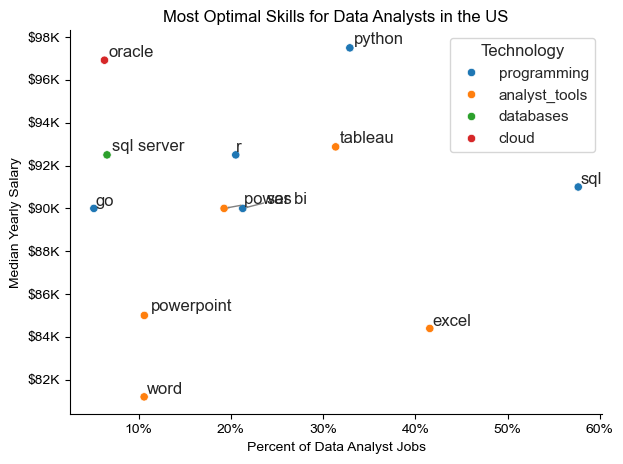

In [28]:
sns.scatterplot(
    data=df_DA_skills_tech_high_demand,
    x='skill_percent',
    y='median_salary',
    hue='technology'
)

sns.despine()
sns.set_theme(style='ticks')

# Prepare texts for adjustText
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Set axis labels, title, and legend
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in the US')
plt.legend(title='Technology')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Adjust layout and display plot 
plt.tight_layout()
plt.show()